<a href="https://colab.research.google.com/github/sophia-li-create/exercise/blob/main/fastAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade fastai

Requirement already up-to-date: fastai in /usr/local/lib/python3.6/dist-packages (2.2.5)


In [ ]:
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.CIFAR)

In [ ]:
datablock = DataBlock((ImageBlock,CategoryBlock),get_items = get_image_files,splitter = GrandparentSplitter(valid_name = 'test'),get_y = parent_label,item_tfms = Resize(460),batch_tfms = [*aug_transforms(size = 224,min_scale = 0.75),Normalize.from_stats(*imagenet_stats)])

In [ ]:
dls = datablock.dataloaders(path,bs = 64)

In [ ]:
x,y = dls.one_batch()

In [ ]:
x.std((0,1)).std()

TensorImage(0.1017, device='cuda:0')

In [ ]:
learn = cnn_learner(dls,resnet34,metrics =[error_rate,accuracy])
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.611527,0.355933,0.125700,0.874300,05:00


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.230508,0.157237,0.055800,0.944200,06:01


SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=9.12010818865383e-07)

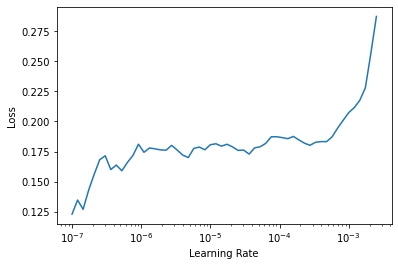

In [ ]:
learn.lr_find()

In [ ]:
learn.save("stage-1")

Path('models/stage-1.pth')

In [ ]:
learn.fit_one_cycle??

In [ ]:
learn.fit_one_cycle(2,1e-5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.154577,0.136095,0.047900,0.952100,06:02
1,0.138270,0.128841,0.045200,0.954800,06:02


In [ ]:
learn.save("stage-2")

Path('models/stage-2.pth')

SuggestedLRs(lr_min=9.120108734350651e-06, lr_steep=6.309573450380412e-07)

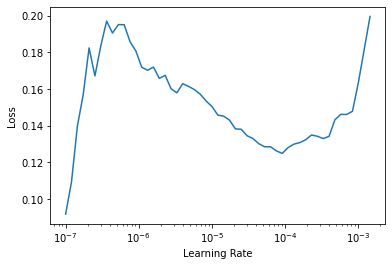

In [ ]:
learn.lr_find()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2,slice(1e-5,2e-5))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.139970,0.123515,0.044300,0.955700,06:03
1,0.112399,0.119566,0.042400,0.957600,06:02


In [ ]:
learn.save("stage-3")

Path('models/stage-3.pth')

SuggestedLRs(lr_min=1.318256749982538e-07, lr_steep=7.585775847473997e-07)

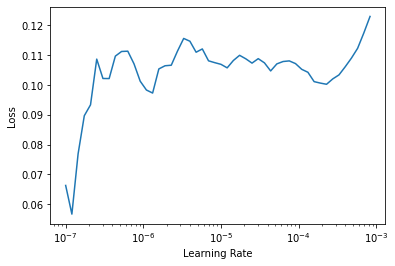

In [ ]:
learn.lr_find()

In [ ]:
datablock2 = DataBlock((ImageBlock,CategoryBlock),get_items = get_image_files,splitter = GrandparentSplitter(valid_name = 'test'),get_y = parent_label,item_tfms = Resize(224),batch_tfms = [*aug_transforms(size = 224,min_scale = 0.75),Normalize.from_stats(*imagenet_stats)])

In [ ]:
dl2 = datablock2.dataloaders(path)

In [ ]:
learn.dls = dl2

In [ ]:
learn.fine_tune(2,1e-5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.107271,0.116425,0.039600,0.960400,04:05


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.108456,0.116098,0.040100,0.959900,05:15
1,0.090449,0.116782,0.039900,0.960100,05:14


In [ ]:
preds,targs = learn.tta()
accuracy(preds,targs).item()

0.9627000093460083